In [15]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
import pandas as pd
figsize(12.5, 8)

import matplotlib.pyplot as plt



In [16]:
scores = pd.read_csv("../data/Scores 7 Wonders - Scores.csv")
scores["Rang relatif"] = -(scores["Rang relatif"].str[:-1].astype(float) / 100)
scores.head()

,Partie,Nb joueurs,Date,Extension,Joueur,Ville,Côté,Rouge,Argent,Merveille,Bleu,Jaune,Violet,Vert,Leaders,Total,Rang,Rang relatif,Vainqueur
0,1,4,NaN,base,S,NaN,NaN,1,4,10,5,7,0,10,NaN,37,4,-1.00,0
1,1,4,NaN,base,L,NaN,NaN,-6,3,10,13,0,7,13,NaN,40,3,-0.67,0
2,1,4,NaN,base,C,NaN,NaN,13,1,10,9,3,9,4,NaN,49,2,-0.33,0
3,1,4,NaN,base,A,NaN,NaN,12,1,10,26,3,9,0,NaN,61,1,-0.00,1
4,2,5,24/10/2015,base,A,NaN,NaN,-5,3,10,12,0,9,21,NaN,50,3,-0.50,0


In [17]:
scores.columns

Index(['Partie', 'Nb joueurs', 'Date', 'Extension', 'Joueur', 'Ville', 'Côté',
       'Rouge', 'Argent', 'Merveille', 'Bleu', 'Jaune', 'Violet', 'Vert',
       'Leaders', 'Total', 'Rang', 'Rang relatif', 'Vainqueur'],
      dtype='object')

In [18]:
couleurs = scores.set_index(["Partie", "Joueur"])[[u'Rouge', u'Argent', u'Merveille', u'Bleu', u'Jaune',
       u'Violet', u'Vert']]
couleurs_r = couleurs.divide(couleurs.sum(axis = 1), axis = 0)
couleurs_r.head()

Rouge    Argent  Merveille      Bleu     Jaune    Violet  \
Partie Joueur                                                                
1      S       0.027027  0.108108   0.270270  0.135135  0.189189  0.000000   
       L      -0.150000  0.075000   0.250000  0.325000  0.000000  0.175000   
       C       0.265306  0.020408   0.204082  0.183673  0.061224  0.183673   
       A       0.196721  0.016393   0.163934  0.426230  0.049180  0.147541   
2      A      -0.100000  0.060000   0.200000  0.240000  0.000000  0.180000   

                   Vert  
Partie Joueur            
1      S       0.270270  
       L       0.325000  
       C       0.081633  
       A       0.000000  
2      A       0.420000

In [19]:
df = pd.merge(scores[["Nb joueurs", "Rang relatif", "Vainqueur", "Partie", "Joueur", "Extension", "Leaders"]], 
              couleurs_r.reset_index(),
              on = ["Partie", "Joueur"]).set_index(["Partie", "Joueur"])

df = df.reset_index()

df.head()

,Partie,Joueur,Nb joueurs,Rang relatif,Vainqueur,Extension,Leaders,Rouge,Argent,Merveille,Bleu,Jaune,Violet,Vert
0,1,S,4,-1.00,0,base,NaN,0.027027,0.108108,0.270270,0.135135,0.189189,0.000000,0.270270
1,1,L,4,-0.67,0,base,NaN,-0.150000,0.075000,0.250000,0.325000,0.000000,0.175000,0.325000
2,1,C,4,-0.33,0,base,NaN,0.265306,0.020408,0.204082,0.183673,0.061224,0.183673,0.081633
3,1,A,4,-0.00,1,base,NaN,0.196721,0.016393,0.163934,0.426230,0.049180,0.147541,0.000000
4,2,A,5,-0.50,0,base,NaN,-0.100000,0.060000,0.200000,0.240000,0.000000,0.180000,0.420000


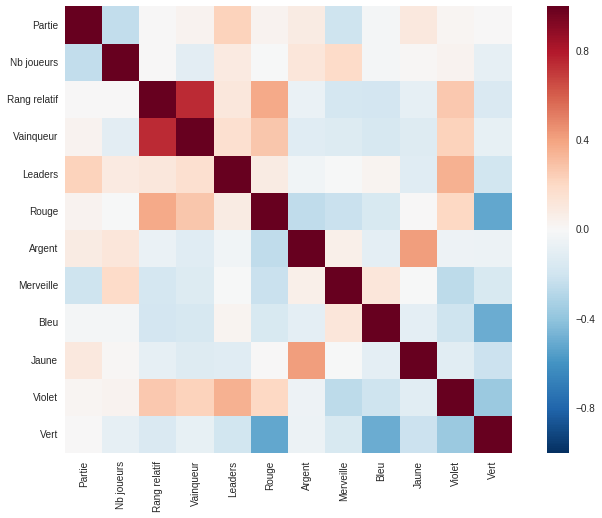

In [20]:
import seaborn as sns

_ = sns.heatmap(df.corr(), square = True)

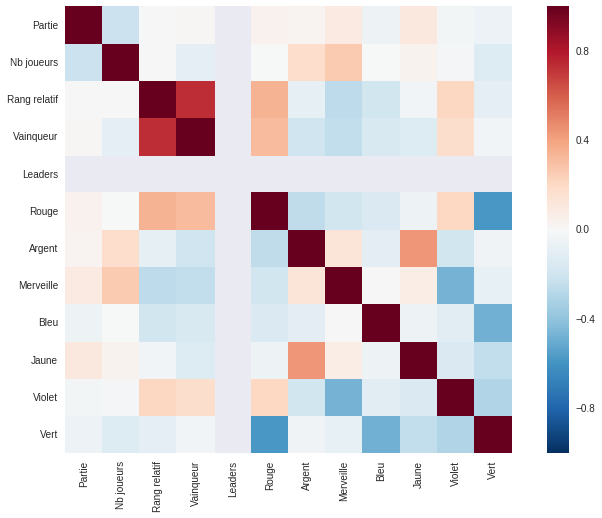

In [21]:
from IPython.html.widgets import interact

mx = df.Partie.max()
print(mx)

@interact
def plot(PourcentageParties = (0., 1.), Ext = ("base", "leaders", "both")):
    Ext = ["base", "leaders"] if Ext == "both" else [Ext]
    _ = sns.heatmap(df[(df.Extension.isin(Ext)) & (df.Partie >= mx * (1-PourcentageParties))].corr(), square = True)

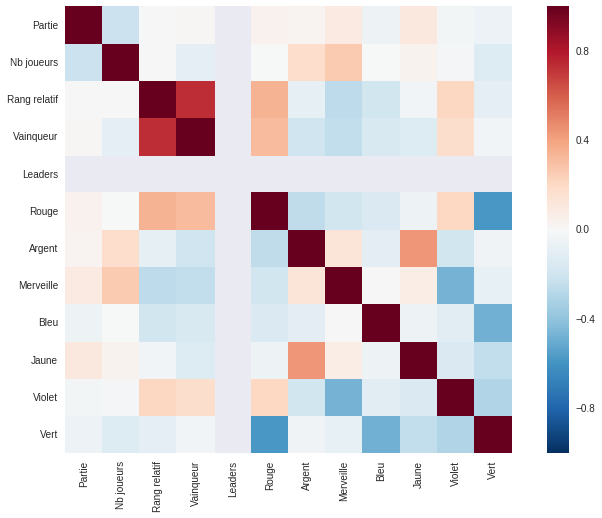

In [22]:
from IPython.html.widgets import interact

mx = df.Partie.max()
print(mx)

@interact
def plot(PourcentageParties = (0., 1.), Ext = ("base", "leaders", "both")):
    Ext = ["base", "leaders"] if Ext == "both" else [Ext]
    _ = sns.heatmap(df[(df.Extension.isin(Ext)) & (df.Partie >= mx * (1-PourcentageParties))].corr(), square = True)

In [23]:
df.Partie.max()

68

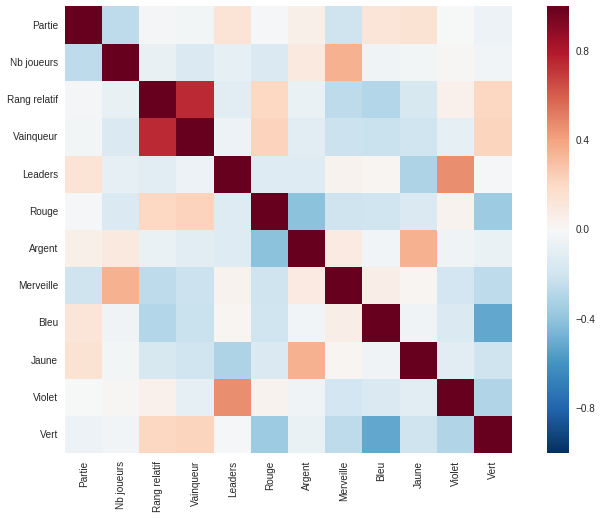

In [24]:
_ = sns.heatmap(df[df.Vert > 0.2].corr(), square = True)

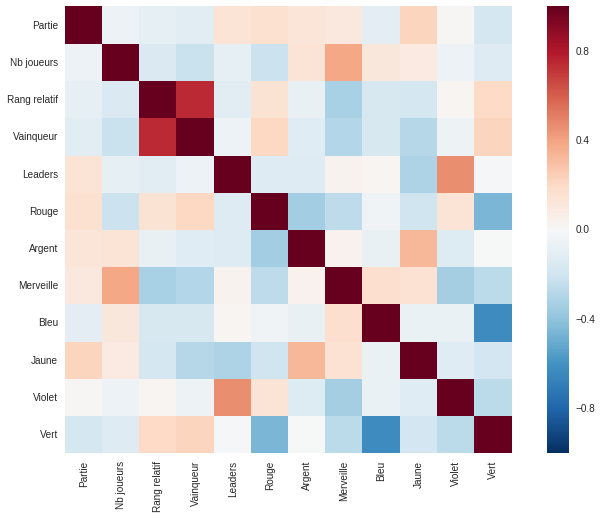

In [25]:
_ = sns.heatmap(df[(df.Vert > 0.2) & (df.Partie >30)].corr(), square = True)

In [26]:
_ = """
from biokit.viz import corrplot

c1 = corrplot.Corrplot(df[df.Vainqueur == 1].corr())
c1.plot(method = "pie")

c1 = corrplot.Corrplot(df[df.Vainqueur == 0].corr())
c1.plot(method = "pie")
"""

In [27]:
df = pd.merge(scores[["Nb joueurs", "Rang relatif", "Vainqueur", "Partie", "Joueur", "Extension", "Leaders", 
                       "Ville", "Côté"]], 
              couleurs_r.reset_index(),
              on = ["Partie", "Joueur"]).set_index(["Partie", "Joueur"])

df = df.reset_index()

cols = list(df.columns)
for c in {'Ville', 'Côté'}:
    cols.remove(c)

df["Côté"][df.Ville.isnull()] = "a"
df.Ville[df.Ville.isnull()] = "none"


df.head()

/home/yannick/bin/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/yannick/bin/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Partie,Joueur,Nb joueurs,Rang relatif,Vainqueur,Extension,Leaders,Ville,Côté,Rouge,Argent,Merveille,Bleu,Jaune,Violet,Vert
0,1,S,4,-1.00,0,base,NaN,none,a,0.027027,0.108108,0.270270,0.135135,0.189189,0.000000,0.270270
1,1,L,4,-0.67,0,base,NaN,none,a,-0.150000,0.075000,0.250000,0.325000,0.000000,0.175000,0.325000
2,1,C,4,-0.33,0,base,NaN,none,a,0.265306,0.020408,0.204082,0.183673,0.061224,0.183673,0.081633
3,1,A,4,-0.00,1,base,NaN,none,a,0.196721,0.016393,0.163934,0.426230,0.049180,0.147541,0.000000
4,2,A,5,-0.50,0,base,NaN,none,a,-0.100000,0.060000,0.200000,0.240000,0.000000,0.180000,0.420000


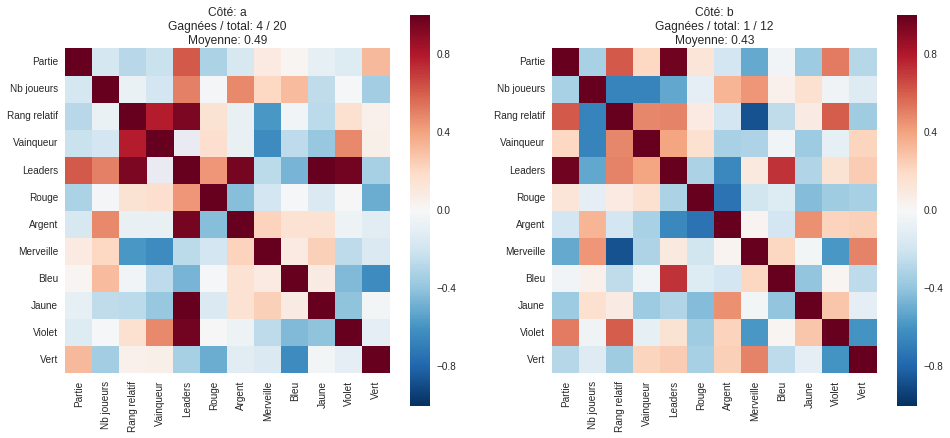

In [28]:
from IPython.html.widgets import interact

mx = df.Partie.max()
print(mx)
Villes = tuple(df.Ville.unique())

@interact
def plot(ville = Villes):

    if ville == "none":
        figsize(8, 7)
        print("Nombres de parties: %d" % len(df.Partie.unique()))
        _ = sns.heatmap(df[cols].corr(), square = True)

    else:
        figsize(16, 7)
        f, axs = plt.subplots(1, 2)
        
        for cote, ax in zip(["a", "b"], axs):
            cette_ville = (df.Ville == ville) & (df["Côté"] == cote)
            
            _ = sns.heatmap(df[cette_ville][cols].corr(), 
                            square=True, 
                            ax=ax)
            
            ax.set_title("Côté: %s\n" % cote + 
                         "Gagnées / total: %d / %d\n" % (
                            (cette_ville & df.Vainqueur).sum(),
                            (cette_ville).sum()) +
                         "Moyenne: %.2f" % (- df[cette_ville]["Rang relatif"].mean()))